
#  Carlos Álvarez

### **Git-hub: https://github.com/Alvarez527**
### **Linkedin: www.linkedin.com/in/cralvarez-ai**

# **Advanced Methods of Machine Learning**


#### Professor: Pepe Cantoral Ph.D.

## **Exploring Transfer Learning with CIFAR-10**
#### Activity 2c: Implementing a Fully Connected Network for Kaggle ASL Dataset

Created On: Feb 7, 2025 | Last Updated: Feb 9, 2025

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Downloading data

This script loads and preprocesses the CIFAR-10 dataset for training, validation, and testing using PyTorch. It applies transformations to match the ImageNet input size (224x224) and normalizes the images for better convergence in deep learning models.

In [ ]:

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/MNA_TEC_DE_MONTERREY/Advanced Machine Learning Methods_TC5033_10/Week4/Actividad 2c/datos'
NUM_TRAIN = 45000
MINIBATCH_SIZE = 64
transform_imagenet = T.Compose([
                T.Resize(224), # Transforms to 224x224, which is the size used in imagenet
                T.ToTensor(),
                T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Training set loader
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_imagenet)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set loader
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing set loader
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#Get the shape and dimensions of the Data
for i, (x, y) in enumerate(val_loader):
    print(i, x.shape, y.shape)

0 torch.Size([64, 3, 224, 224]) torch.Size([64])
1 torch.Size([64, 3, 224, 224]) torch.Size([64])
2 torch.Size([64, 3, 224, 224]) torch.Size([64])
3 torch.Size([64, 3, 224, 224]) torch.Size([64])
4 torch.Size([64, 3, 224, 224]) torch.Size([64])
5 torch.Size([64, 3, 224, 224]) torch.Size([64])
6 torch.Size([64, 3, 224, 224]) torch.Size([64])
7 torch.Size([64, 3, 224, 224]) torch.Size([64])
8 torch.Size([64, 3, 224, 224]) torch.Size([64])
9 torch.Size([64, 3, 224, 224]) torch.Size([64])
10 torch.Size([64, 3, 224, 224]) torch.Size([64])
11 torch.Size([64, 3, 224, 224]) torch.Size([64])
12 torch.Size([64, 3, 224, 224]) torch.Size([64])
13 torch.Size([64, 3, 224, 224]) torch.Size([64])
14 torch.Size([64, 3, 224, 224]) torch.Size([64])
15 torch.Size([64, 3, 224, 224]) torch.Size([64])
16 torch.Size([64, 3, 224, 224]) torch.Size([64])
17 torch.Size([64, 3, 224, 224]) torch.Size([64])
18 torch.Size([64, 3, 224, 224]) torch.Size([64])
19 torch.Size([64, 3, 224, 224]) torch.Size([64])
20 torch.S

### Using GPU

In [ ]:
#Check in graphic Card is available, if so then use it
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cuda


### Show images

La imagen muestreada representa un: Car


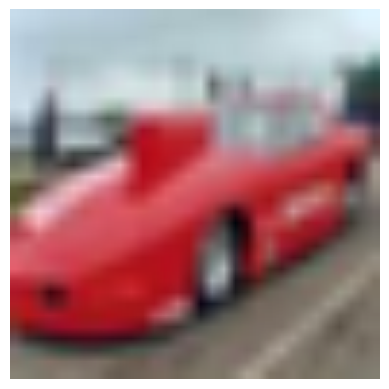

In [ ]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

### Calculate Accuracy

In [ ]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for (xi, yi) in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            scores = model(xi) # mb_size, 10
            _, pred = scores.max(dim=1) #pred shape (mb_size)
            num_correct += (pred == yi).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            num_total += pred.size(0)
        return float(num_correct)/num_total

### Upload pre-trained model ResNet18

Resnet-18 models are widely used convolution neural network architectures in the field of computer vision. Resnet-18 deep learning architecture is based on CNN. It is composed of 18 layers deep.

In 2015, K.M. He et al. (2016) introduced ResNet as a solution to the challenges posed by the diminishing or excessive gradient and subsequent decline in performance resulting from the increased depth of neural networks.


The residual unit of the ResNet model addresses the problem of performance degradation caused by an excessive number of layers in convolution process. ResNet-18 is composed of a single convolutional layer with dimensions of 7× 7, two pooling layers, eight residual units, and one fully connected layer. Each residual unit consists of two 3 × 3 convolutional layers, together with a fully connected layer that includes 10 distinct image types from the selected dataset (Al-Khater & Al-Madeed, 2024, pp. 44-45).

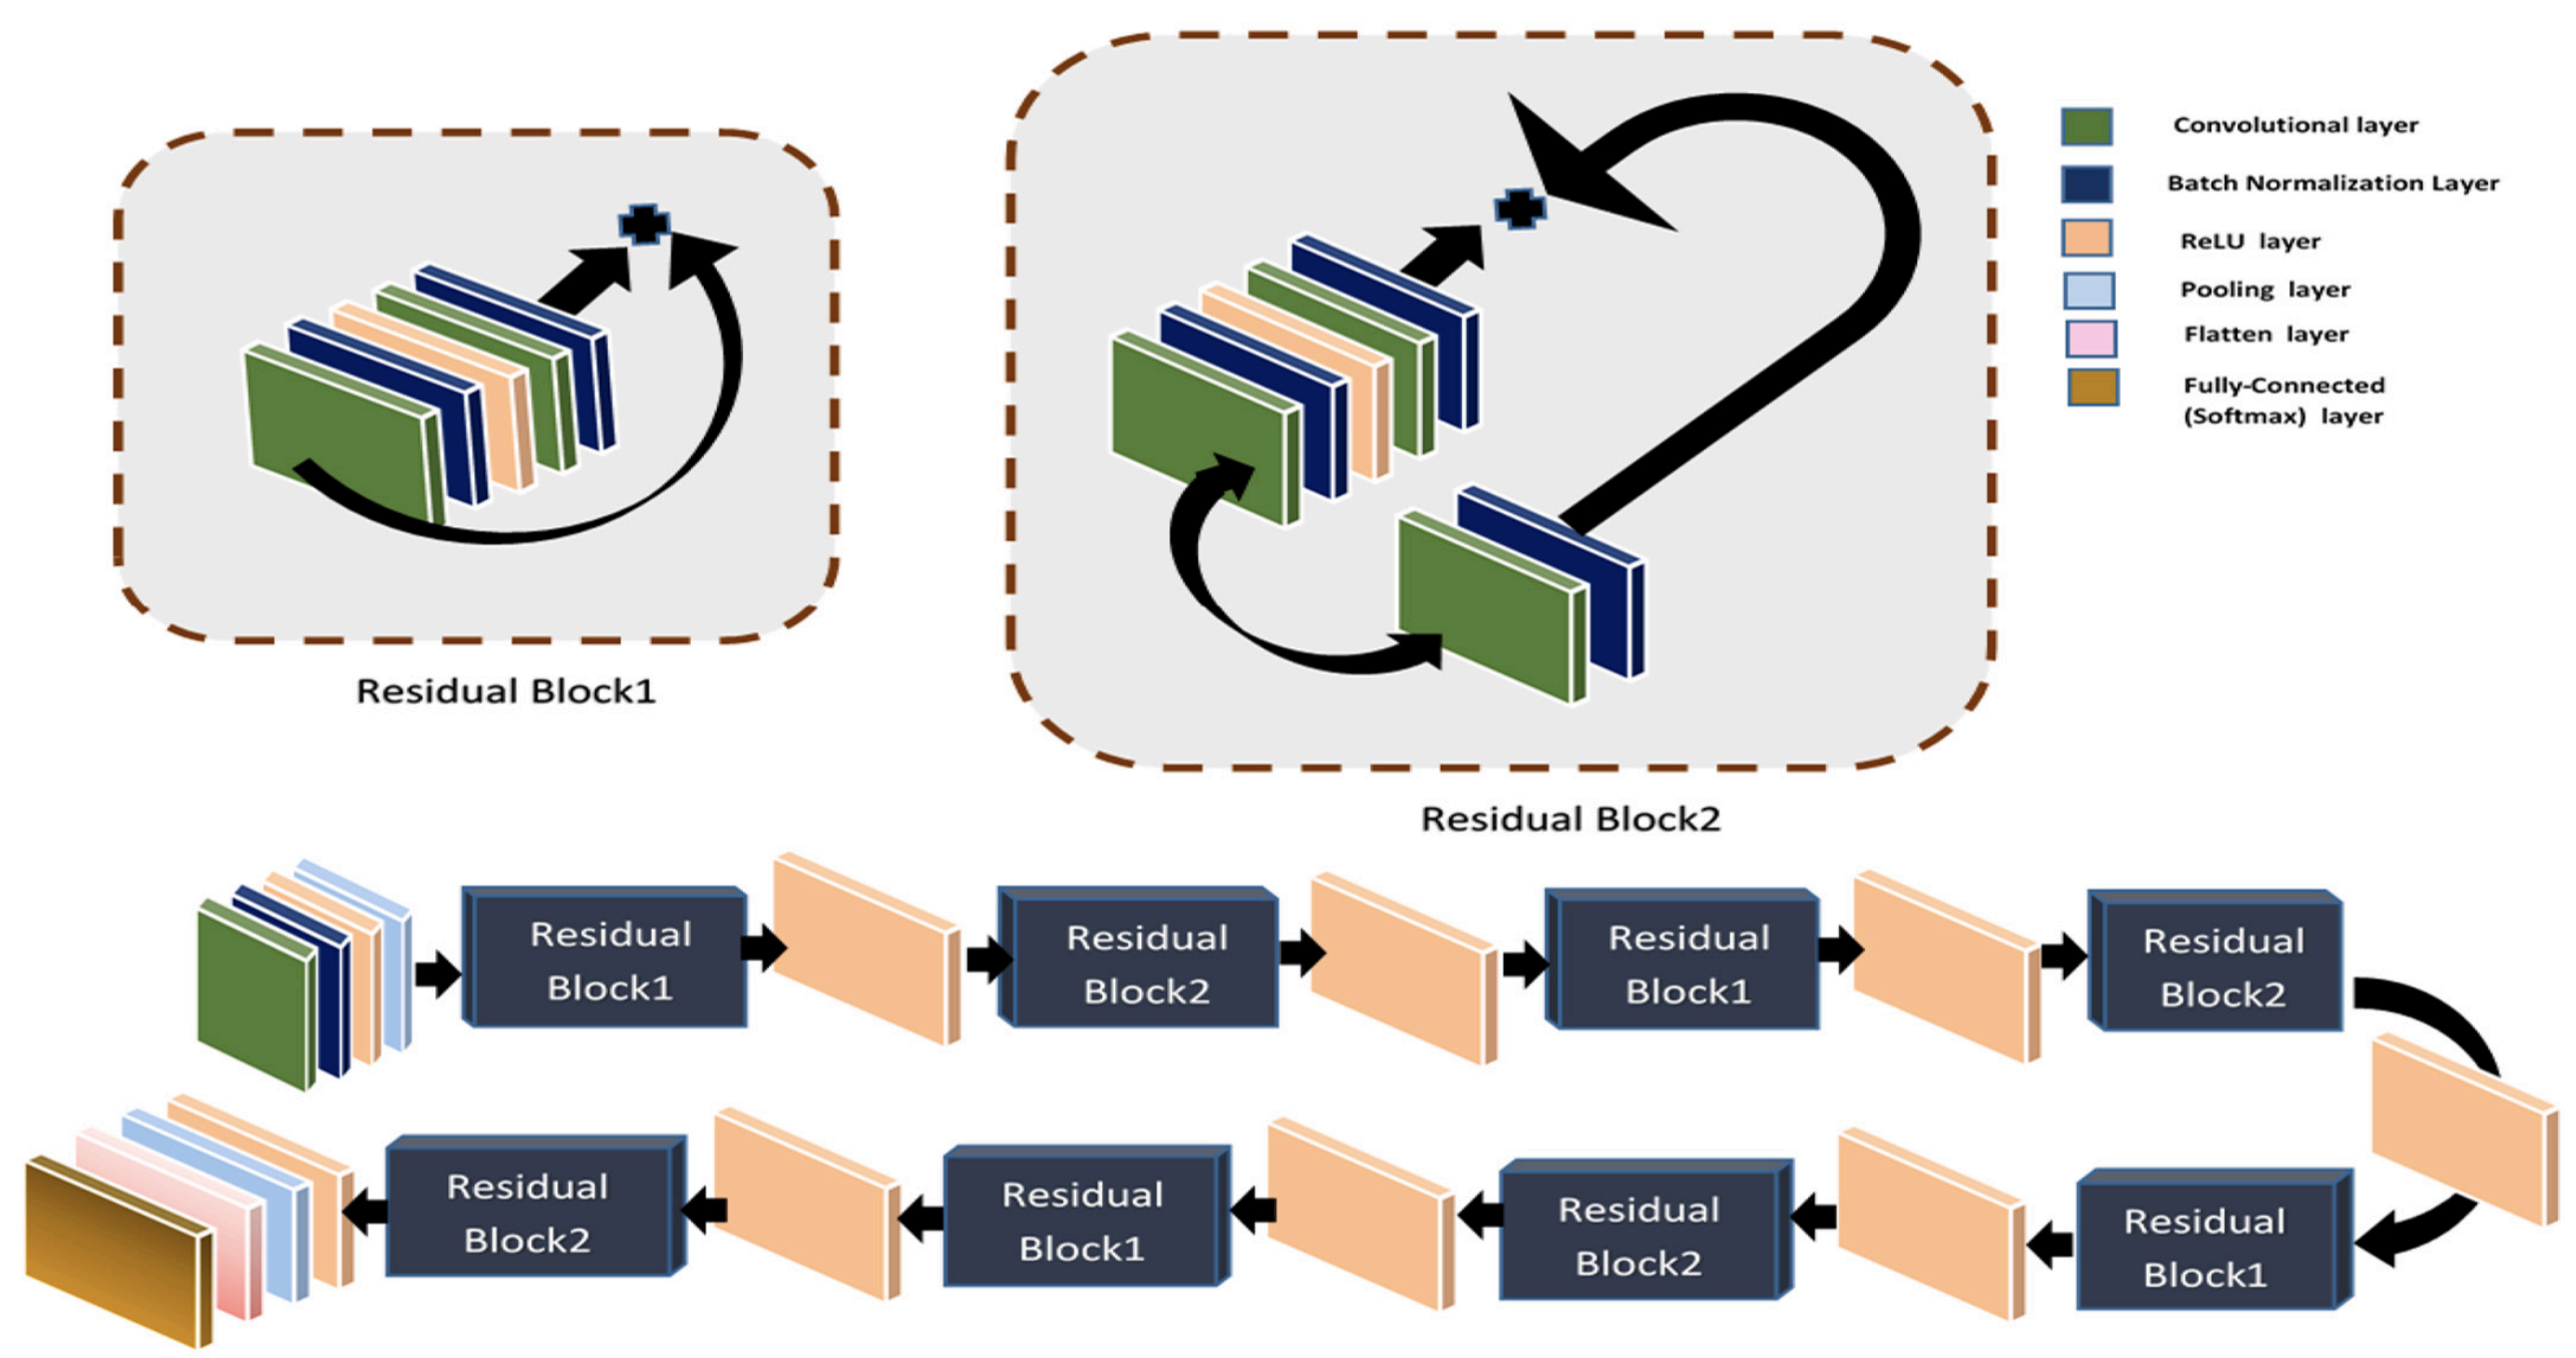

In [ ]:
model_resnet18 = models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 86.7MB/s]


#### Exploring the model ResNet 18

This following code is iterating over the parameters of a ResNet-18 model (model_resnet18) and printing some information about each parameter in such a way that the information will indicate the following:

  - **`w.shape`**: The shape (dimensions) of the parameter tensor, which indicates the number of weights/biases in that layer.

  - **`w.requires_grad`**: A boolean flag indicating whether the parameter requires gradient computation (i.e., if it's trainable).

In [ ]:
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

This is the architecture of a ResNet-18 model, a popular convolutional neural network (CNN) used for image classification. Below are the elements of its architecture, along with key mathematical representations:

- **`Input Layer:`**  
  The input image $X$ passes through a 2D convolution operation:
  $$
  Y = W \cdot X + b
  $$
  where $W$ represents the filter weights, $b$ is the bias, and $ \cdot $ denotes the convolution operation.  
  This is followed by batch normalization, ReLU activation, and max pooling:
  $$
  \text{BN}(x) = \frac{x - \mu}{\sigma + \epsilon}
  $$
  where $ \mu $ is the mean, $ \sigma $ is the standard deviation, and $ \epsilon $ is a small value to prevent division by zero.

- **`Layer 1:`**  
  Contains two basic blocks with $3 \times 3$ convolutions. Each block can be represented as:
  $$
  F(x) = \text{ReLU}(\text{ConvBN}(\text{ReLU}(\text{ConvBN}(x))))
  $$

- **`Layer 2:`**  
  The first block in this layer doubles the number of channels (64 → 128) and halves the spatial size (stride 2):
  $$
  \text{Output Size} = \frac{\text{Input Size}}{2}
  $$

- **`Layer 3:`**  
  Similar to Layer 2, but now the channels increase from 128 to 256.

- **`Layer 4:`**  
  Again, the channels are doubled (256 → 512) and the spatial size is halved.

- **`Global Average Pooling (GAP):`**  
  Reduces each feature map to a single value by averaging all its elements:
  $$
  y_c = \frac{1}{H \times W} \sum_{i=1}^{H} \sum_{j=1}^{W} x_{ijc}
  $$
  where $H$ and $W$ are the height and width of the feature map, and $x_{ijc}$ is the value at position $(i, j)$ of channel $c$.

- **`Fully Connected Layer:`**  
  Maps the resulting vector to 1000 classes:
  $$
  \hat{y} = W_{\text{fc}} z + b_{\text{fc}}
  $$
  where $z$ is the input vector, and $W_{\text{fc}}$ and $b_{\text{fc}}$ are the weights and biases of the layer.

- **`Skip Connections:`**  
  To prevent gradient loss, the original input is added to the block output:
  $$
  y = F(x) + x
  $$
  This improves learning efficiency and allows deeper networks to be trained effectively.

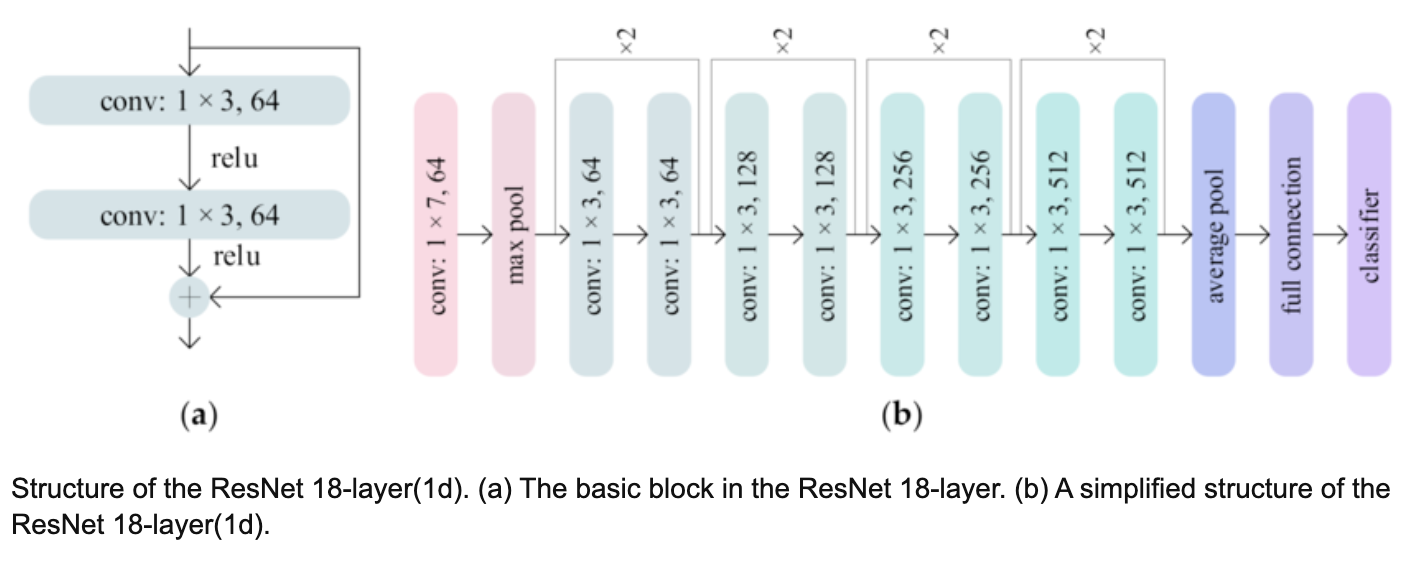

In [ ]:
model_resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### Adjust the model

In this section, the intention is that we can remove layers that we do not need in order to attach our own layer later. This will allow us to transfer the learning of the pretrained model to our new additional layer.

In the field of ML, large datasets and increased computing power have led to the emergence of pre-trained models for various language tasks. After unsupervised pre-training and fine-tuning, these models have demonstrated excellent representation learning and capabilities (Kuang et al., 2025, p.4).

These pre-trained models are designed to extract meaningful features from raw input data (Kumar et al.,  2025, p.4).

Thus, knowledge transfer (TL) is a technique that enables us to move knowledge from one model to another. Two steps make up a TL procedure:
- Step 1: Select a pre-trained model that has been thoroughly trained using extensive data relevant to the current problem.
    
- Step 2: Optimize the pre-trained model by either fine-tuning its weights through re-training on the target dataset or simply adjusting its architecture to align with the final solution, such as modifying the output layer to match the number of classes in the classification task (Sharma et al., 2025, p. 7).

With the following instruction we remove the last layer of the pretrained model, because we will need to add our own layer with 10 neurons at the exit, by doing so we will be able to adapt the model to our needs which in this case is 10 classes.

In [ ]:
# Creates a new model using all layers except the last one
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])

By printing the model again we can see that the last linear layer has been removed

In [ ]:
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

Now, we iterate over all the parameters and set requires_grad to False, ensuring that all layers of the pre-trained model remain frozen. Only the newly added final layer will be trained.

In [ ]:
# Freeze the parameters of the new model_aux
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

#### Train Loop

This function trains a PyTorch model using a given optimizer for a specified number of epochs. It performs forward propagation, loss calculation, backpropagation, and optimization updates while evaluating accuracy on a validation set.

In [ ]:
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)

            cost = F.cross_entropy(input= scores, target=yi)

            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

        acc = accuracy(model, val_loader)
        #if epoch%5 == 0:
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')

#### Definition Model 1

The pre-trained model is used as a base in a new model, where we add a final layer with 10 neurons as the output. This approach transfers the knowledge from the pre-trained model to the newly added layer, enabling classification into 10 classes.

In [ ]:
hidden1 = 256
hidden = 256
lr = 5e-4
epochs = 5

model1 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=512, out_features= 10, bias= True))

optimiser = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
train(model1, optimiser, epochs)

Epoch: 0, costo: 1.0332685708999634, accuracy: 0.7754,
Epoch: 1, costo: 0.9287351369857788, accuracy: 0.7922,
Epoch: 2, costo: 0.3555029630661011, accuracy: 0.7974,
Epoch: 3, costo: 0.7138096690177917, accuracy: 0.801,
Epoch: 4, costo: 0.5822744965553284, accuracy: 0.8046,


In [ ]:
accuracy(model1, test_loader)

0.7998

### Upload pre-trained model ResNet50

Before trying another 2 different models we will try another variation of ResNet50

In [ ]:
#Load the pretrained model resnet 50
model_resnet50 = models.resnet50(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 213MB/s]


In [ ]:
#Review the paramneters of the model
for i, w in enumerate(model_resnet50.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 1, 1]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([256, 64, 1, 1]) True
10 torch.Size([256]) True
11 torch.Size([256]) True
12 torch.Size([256, 64, 1, 1]) True
13 torch.Size([256]) True
14 torch.Size([256]) True
15 torch.Size([64, 256, 1, 1]) True
16 torch.Size([64]) True
17 torch.Size([64]) True
18 torch.Size([64, 64, 3, 3]) True
19 torch.Size([64]) True
20 torch.Size([64]) True
21 torch.Size([256, 64, 1, 1]) True
22 torch.Size([256]) True
23 torch.Size([256]) True
24 torch.Size([64, 256, 1, 1]) True
25 torch.Size([64]) True
26 torch.Size([64]) True
27 torch.Size([64, 64, 3, 3]) True
28 torch.Size([64]) True
29 torch.Size([64]) True
30 torch.Size([256, 64, 1, 1]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([128, 256, 1, 1]) True
34 torch.Size([128]) True

In [ ]:
#Obtain the structure of the complete model
model_resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
#Decompose the model and create a new sequential object based on all the components of resnet50
model_resnet50_aux = nn.Sequential(*list(model_resnet50.children()))

In [ ]:
#Show the decomposed structure
model_resnet50_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
#Eliminate the last layer so that we can attach our new one according to our needs
model_resnet50_aux = nn.Sequential(*list(model_resnet50.children())[:-1])

In [ ]:
#Confirm the last layer is eliminated
model_resnet50_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
#Change the requires_grad parameter to false, so that the pretrained model will no be trained again and just the last layer.
for i, parameter in enumerate(model_resnet50_aux.parameters()):
    parameter.requires_grad = False

In [ ]:
#Show all requires_grad parameters to False
for i, parameter in enumerate(model_resnet50_aux.parameters()):
    print(i, parameter.requires_grad)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
#Prepare the new model based on ResNet-50 by adding a final layer with 10 neurons as the output, enabling it to classify 10 classes.
#Se considera la salida de la capa convolucional previa de 2048 X 1 x 1, es decir se requieren 2048 features
lr = 5e-4
epochs = 5

model_resnet50_new = nn.Sequential(model_resnet50_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=2048, out_features= 10, bias= True))

optimiser_resnet_50 = torch.optim.Adam(model_resnet50_new.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
#Show the Structure of the new model
model_resnet50_new

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
#Training Phase
train(model_resnet50_new, optimiser_resnet_50, epochs)

Epoch: 0, costo: 0.5455228090286255, accuracy: 0.7924,
Epoch: 1, costo: 0.42775002121925354, accuracy: 0.7962,
Epoch: 2, costo: 0.9682725071907043, accuracy: 0.8126,
Epoch: 3, costo: 0.5625855922698975, accuracy: 0.8084,
Epoch: 4, costo: 1.0931941270828247, accuracy: 0.8102,


In [ ]:
#Accuracy Calculation
accuracy(model_resnet50_new, test_loader)

0.8094

### Upload pre-trained model Densenet169

We will try Densenet, specifically Densenet169, given that it has a somewhat similar number of parameters (12M\~) than ResNet18 (11M\~).

The architecture of the DenseNet169 comprises two main parts: a classifier and feature extraction. The two essential layers of the DenseNet169 are the convolution and pooling layers. Each node in the convolution layer extracts features from the input images by performing a convolution operation on the input nodes. The max-pooling layer abstracts the features by averaging or calculating the maximum value of input nodes.

The DenseNet169 is a highly supervised network with a 4 or 5-layer dense block, the standard ResNet structure, and a growth rate of k = 4. A dense DenseNet block is suitable for object detection because the output of each layer includes the output of all layers before it and includes both low-level and high-level image features (El-Ghany et al., 2023, p. 232).

DenseNet169 is a great choice over other models because it features dense connections, where each layer receives input from all previous layers. This allows for more efficient feature reuse and reduces the number of parameters. It tends to perform better in terms of accuracy while being more parameter-efficient compared to traditional deep networks. DenseNet169 strikes a good balance between depth and complexity, making it suitable for a variety of classification tasks. Its pretraining on large datasets like ImageNet helps leverage learned features effectively, especially for more complex problems.

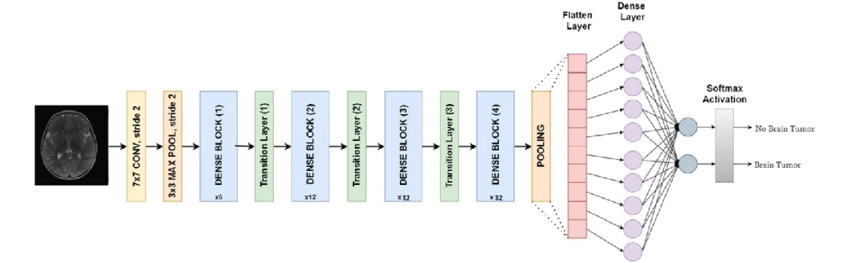

In [ ]:
model_densenet169 = models.densenet169(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 190MB/s]


In [ ]:
for i, w in enumerate(model_densenet169.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64]) True
4 torch.Size([64]) True
5 torch.Size([128, 64, 1, 1]) True
6 torch.Size([128]) True
7 torch.Size([128]) True
8 torch.Size([32, 128, 3, 3]) True
9 torch.Size([96]) True
10 torch.Size([96]) True
11 torch.Size([128, 96, 1, 1]) True
12 torch.Size([128]) True
13 torch.Size([128]) True
14 torch.Size([32, 128, 3, 3]) True
15 torch.Size([128]) True
16 torch.Size([128]) True
17 torch.Size([128, 128, 1, 1]) True
18 torch.Size([128]) True
19 torch.Size([128]) True
20 torch.Size([32, 128, 3, 3]) True
21 torch.Size([160]) True
22 torch.Size([160]) True
23 torch.Size([128, 160, 1, 1]) True
24 torch.Size([128]) True
25 torch.Size([128]) True
26 torch.Size([32, 128, 3, 3]) True
27 torch.Size([192]) True
28 torch.Size([192]) True
29 torch.Size([128, 192, 1, 1]) True
30 torch.Size([128]) True
31 torch.Size([128]) True
32 torch.Size([32, 128, 3, 3]) True
33 torch.Size([224]) True
34 torch.Size([224]) 

In [ ]:
model_densenet169

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# Create a new model using layers from the original model except the last one
model_densenet169_aux = nn.Sequential(*list(model_densenet169.children())[:-1]) # With *list we unpack the elements of the list
model_densenet169_aux

Sequential(
  (0): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): R

In [ ]:
# Freeze the parameters of the new model_aux
for i, parameter in enumerate(model_densenet169_aux.parameters()):
    parameter.requires_grad = False

In [ ]:
lr = 5e-4
epochs = 5

model2 = nn.Sequential(model_densenet169_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=81536, out_features= 10, bias= True))

optimiser = torch.optim.Adam(model2.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
train(model2, optimiser, epochs)

Epoch: 0, costo: 4.430337429046631, accuracy: 0.8438,
Epoch: 1, costo: 0.20343118906021118, accuracy: 0.8406,
Epoch: 2, costo: 0.36517298221588135, accuracy: 0.8406,
Epoch: 3, costo: 2.1587750911712646, accuracy: 0.8438,
Epoch: 4, costo: 3.810128688812256, accuracy: 0.847,


In [ ]:
accuracy(model2, test_loader)

0.8438

### Upload pre-trained model VGG11_bn

Now we will try a model that uses more parameters VGG11 (28M\~) to see if we get even better results.

VGG is a deep convolutional neural network (CNN) architecture similar to AlexNet but with key differences. It uses smaller 3x3 convolution kernels and deeper layers, which significantly improve accuracy. VGG includes four models: VGG11, VGG13, VGG16, and VGG19, corresponding to the number of layers in the network.

The architecture consists of convolutional layers for feature extraction, max pooling layers for dimensionality reduction, and fully connected layers for classification. ReLU activation is used in all layers, and dropout is applied in the last two fully connected layers to reduce overfitting. Among the VGG models, VGG11 is the simplest and has 11 layers, offering a good balance between complexity and performance (Chen et al., 2024, p. 156).

VGG11 is a great choice over other VGG models or non-VGG models because it strikes a balance between performance and efficiency. It's faster to train and has a lower risk of overfitting compared to deeper VGG models like VGG16 or VGG19. Additionally, it still benefits from the robust feature extraction of VGG architectures and pretraining on large datasets like ImageNet, making it a solid option for many classification tasks without the computational cost of deeper models.

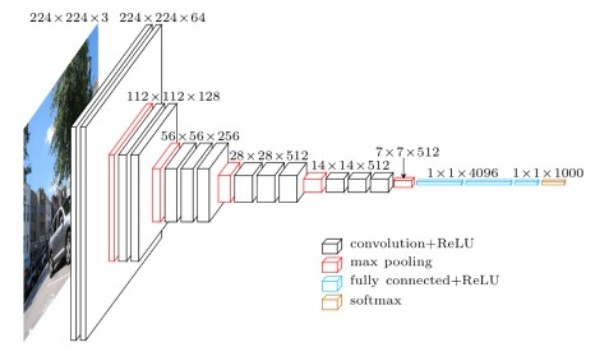

In [ ]:
model_vgg11_bn = models.vgg11_bn(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:06<00:00, 83.0MB/s]


In [ ]:
model_vgg11_bn

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [ ]:
# Create a new model using layers from the original model except the last one
model_vgg11_bn_aux = nn.Sequential(*list(model_vgg11_bn.children())[:-1]) # With *list we unpack the elements of the list
model_vgg11_bn_aux

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool2d(ke

In [ ]:
# Freeze the parameters of the new model_aux
for i, parameter in enumerate(model_vgg11_bn_aux.parameters()):
    parameter.requires_grad = False

In [ ]:
lr = 5e-4
epochs = 5

model3 = nn.Sequential(model_vgg11_bn_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=25088, out_features= 10, bias= True))

optimiser = torch.optim.Adam(model3.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
train(model3, optimiser, epochs)

Epoch: 0, costo: 0.2077004462480545, accuracy: 0.85,
Epoch: 1, costo: 0.3178895115852356, accuracy: 0.8576,
Epoch: 2, costo: 0.2104092389345169, accuracy: 0.857,
Epoch: 3, costo: 0.1479099988937378, accuracy: 0.8594,
Epoch: 4, costo: 0.17862385511398315, accuracy: 0.8616,


In [ ]:
accuracy(model3, test_loader)

0.863

## Evaluating results



*   Accuracy when using **ResNet18**: **79.98%**
*   Accuracy when using **ResNet50**: **80.94%**
*   Accuracy when using **Densenet169**: **84.38%**
*   Accuracy when using **VGG11_bn**: **86.35%**



## Conclusion

ResNet18 has the lowest accuracy of the four models, which is expected due to its simpler architecture compared to the other two. ResNet50 performs better, as expected, due to its higher number of layers (50); however, the difference in performance is not significant.

DenseNet169 has more layers (depth) than ResNet18 and ResNet50, which could explain its better performance when compared to them.

We can see that VGG gives us better results. This can be due to this model having more parameters and it uses Batch normalization, which can help handle more complexity from the images.

## Lessons Learned from Pre-training on CIFAR Models

- Batch Normalization Boosts Performance: VGG11_bn performed best (86.35%) due to batch normalization, which stabilized training and enhanced generalization, crucial for small datasets like CIFAR.

- Deep Architectures Perform Better: Models like DenseNet169 (84.38%) outperformed shallower ones due to their ability to reuse features across layers, improving their performance on complex tasks despite limited image resolution.

- Residual Networks Have Limitations on Small Datasets: While ResNet50 and ResNet18 showed competitive accuracy (80.94% and 79.98%, respectively), their performance was still lower than that of VGG11_bn and DenseNet169, suggesting that residual connections alone aren’t always enough to capture fine-grained details in CIFAR images.

- Model Complexity Balances Accuracy: More complex models like DenseNet169 performed better by leveraging dense connections, which are key to learning from small datasets by capturing intricate features more effectively.

- Overfitting and Generalization Trade-offs: The regularization in VGG11_bn helped prevent overfitting, crucial for generalization in a small dataset. Even with fewer parameters than DenseNet169, it achieved a strong result.

# References

Al-Khater, W., & Al-Madeed, S. (2024). Using 3D-VGG-16 and 3D-Resnet-18 deep learning models and FABEMD techniques in the detection of malware. *Alexandria Engineering Journal*, *89*, 39-52. https://doi.org/10.1016/j.aej.

Chen, Y., Li, Y., Cheng, C., & Ying, H. (2024). Neural network based cognitive approaches from face perception with human performance benchmark. *Pattern Recognition Letters*, *184*, 155-161. https://doi.org/10.1016/j.patrec.2024.06.024.

El-Ghany, S., Elmogy, M., & El-Aziz, A. (2023). A fully automatic fine tuned deep learning model for knee osteoarthritis detection and progression analysis. *Egyptian Informatics Journal*, *24*, 229-240. https://doi.org/10.1016/j.eij.2023.03.005.

He, K., Zhang, X., Ren, S., & Sun, J. (2016) Deep residual learning for image recognition. *Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition*, 770–778. https://doi.org/10.48550/arXiv.1512.03385.

Kuang, S., Quan, Z., Xie, G., Cai, X., Chen, X., & Li, K. (2025). NtNDet: Hardware Trojan detection based on pre-trained language models. *Expert Systems With Applications*, *271*, 1-13. https://doi.org/10.1016/j.eswa.2025.126666.

Kumar, A., Kumar, R., & Chandra, M. (2025). Enhanced audio classification leveraging pre-trained deep visual models. *Engineering Applications of Artificial Intelligence*, *144*, 1-22. https://doi.org/10.1016/j.engappai.2025.110130.

Sharma, A., Nandal, A., Dhaka, A., Alhudhaif, A., Polat, K., & Sharma, A. (2025). Diagnosis of cervical cancer using CNN deep learning model with transfer learning approaches. *Biomedical Signal Processing and Control*, *105*, 1-13. https://doi.org/10.1016/j.bspc.2025.107639.

Zhao, Y., Wang, X., Lin, Z., & Huang, Z. (2022). Multi-Classifier Fusion for Open-Set Specific Emitter Identification. Remote Sensing.